# Do You Really Understand Try & Finally in Python?

In python, `try` and `except` blocks are often used by programmers for handling any exception or unhappy scenarios. `finally` clause is very under appreciated & can be better utilized. Let us check out how *final-block* works.

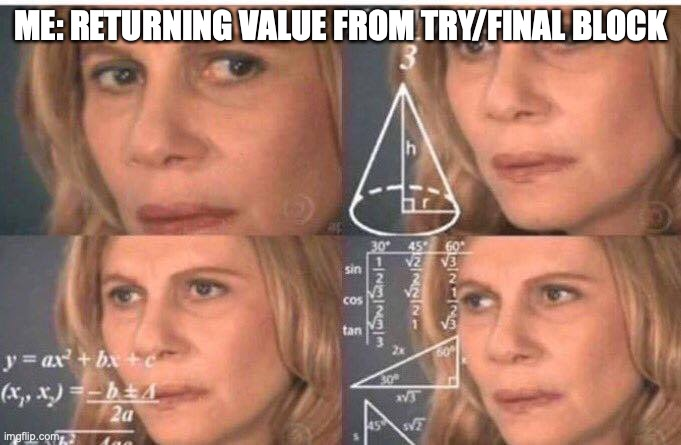

# Deep dive

> No matter what happened previously, the final-block is executed once the code block is complete and any raised exceptions handled. Even if there's an error in an exception handler or the else-block and a new exception is raised, the code in the final-block is still run.

This quote from the python [documentation](https://docs.python.org/2.5/whatsnew/pep-341.html) is absolutely correct but the execution behavior is little tricky when `try` or `finally` block is encapsulated within a function. Let me explain with examples. See if you could guess the output of the following functions.

# Example 1:

In [101]:
# Both the try & final blocks have print statements and function returns value from final-block
def example_1():
    try:
        val = 1
        print(f"Print: Try Block - {val}")
    finally:
        val = val + 1
        print(f"Print: Finally Block - {val}")
        return f"Return: Finally Block - {val}"
    
example_1()

Print: Try Block - 1
Print: Finally Block - 2


'Return: Finally Block - 2'

Function `example_1` is simple and straight, first the *try-block* gets executed and then *final-block*. The variable `val` has value **1** in *try-block* and gets updated to **2** in *final-block*.

<hr style="border:0.5px dashed gray"> </hr>

# Example 2:

In [6]:
# The try block has return statement & final block has only print statement
def example_2():
    try:
        val = 1
        print(f"Print: Try Block - {val}")
        return f"Return: Try Block - {val}"
    finally:
        val = val + 1
        print(f"Print: Finally Block - {val}")
        
example_2()

Print: Try Block - 1
Print: Finally Block - 2


'Return: Try Block - 1'

Function `example_2` is where things get a bit tricky, the `return` statement in *try-block* is executed after the *final-block* but the value of the variable `val` returned is not affected by the *final-block*.

<hr style="border:0.5px dashed gray"> </hr>

# Example 3:

In [1]:
# Both the try & final blocks have return statements
def example_3():
    try:
        val = 1
        print(f"Print: Try Block - {val}")
        return f"Return: Try Block - {val}"
    finally:
        val = val + 1
        print(f"Print: Finally Block - {val}")
        return f"Return: Finally Block - {val}"
    
example_3()

Print: Try Block - 1
Print: Finally Block - 2


'Return: Finally Block - 2'

Output of the function `example_3` is easy to guess. When the `return` statement in *final-block* is executed, the function exits so the `return` statement in *try-block* is never executed.

<hr style="border:0.5px dashed gray"> </hr>

# Take Away

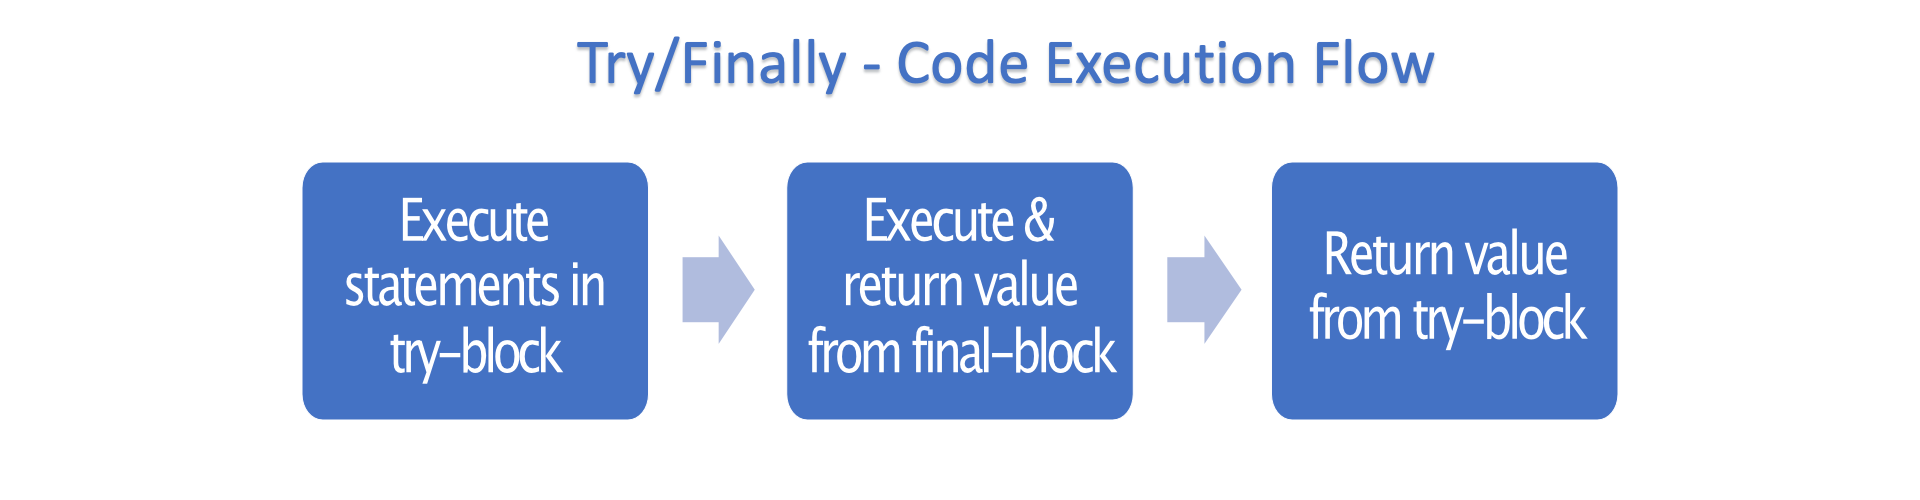

`try` & `finally` blocks are not quite as straight forward as one might think, especially when they are returning values from a function. The takeaways from this post are:
1. Where you put the `return` statement is going to make a difference.
2. Even though the `return` statement from *try-block* is executed after the *final-block*, value of the variable returned won't be affected by alteration made in the *final-block.*